## Weather Classification
### Data Transformation

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assemble pipeline(s)
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector

# Features engineering
from feature_engine.imputation import CategoricalImputer
from feature_engine.imputation import MeanMedianImputer
from feature_engine.outliers import OutlierTrimmer
from feature_engine.encoding import OrdinalEncoder
from feature_engine.datetime import DatetimeFeatures
from feature_engine.selection import DropFeatures
from feature_engine.selection import DropConstantFeatures
from feature_engine.selection import DropCorrelatedFeatures
from feature_engine.selection import DropDuplicateFeatures
from feature_engine.transformation import YeoJohnsonTransformer

In [48]:
# Dsplay pipelines
from sklearn import set_config
set_config(display="diagram")

In [49]:
import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [50]:
# Weather Classification dataset
# It contains 21 columns including the target variable RainTomorrow (YES/NO).
df = pd.read_csv('../../../data/weather-classification-clean.csv')
df.sample(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,target
1267,2012-08-20,Region1,2.1,12.4,0.0,SE,17.0,N,S,2.0,...,89.0,55.0,1024.6,1020.4,8.0,2.0,6.4,11.7,No,0
24213,2015-12-05,Region10,9.9,30.9,0.0,ENE,30.0,NE,E,6.0,...,70.0,25.0,1022.8,1017.4,5.0,5.0,19.1,29.1,No,0
19617,2010-05-12,Region9,6.8,19.0,0.0,SSW,37.0,SSW,SSW,11.0,...,40.0,26.0,1018.5,1015.9,5.0,5.0,13.7,19.0,No,0
5993,2009-10-14,Region3,12.4,21.5,0.0,WSW,54.0,W,W,24.0,...,47.0,28.0,1008.7,1008.8,2.0,4.0,14.7,20.8,No,0
21505,2016-01-26,Region9,20.4,29.4,0.6,E,26.0,SW,ESE,6.0,...,98.0,62.0,1018.5,1015.9,5.0,5.0,21.4,28.2,No,0
26289,2015-07-02,Region11,7.0,16.4,0.0,WSW,65.0,W,WSW,22.0,...,70.0,40.0,1020.0,1016.8,7.0,1.0,8.4,16.1,No,0
14321,2011-02-21,Region7,20.5,25.0,0.6,SSE,69.0,S,SSE,30.0,...,91.0,74.0,1012.3,1012.5,5.0,5.0,20.6,22.8,No,0
372,2009-12-22,Region1,15.1,36.6,0.0,WSW,39.0,ENE,SW,11.0,...,44.0,10.0,1010.9,1007.3,5.0,5.0,23.1,35.9,No,0
25819,2014-02-25,Region11,19.5,26.7,0.0,NE,50.0,NNW,NE,6.0,...,72.0,54.0,1017.9,1013.6,3.0,1.0,23.2,26.1,No,0
9468,2012-02-18,Region4,16.7,27.4,0.0,E,30.0,WNW,E,6.0,...,68.0,57.0,1017.5,1015.3,1.0,1.0,23.8,26.6,No,0


In [62]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
target             int64
dtype: object

## Feature Engineering

In [52]:
X = df.drop('target', axis=1)
y = df['target']
X

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2008-12-01,Region1,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No
1,2008-12-02,Region1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No
2,2008-12-03,Region1,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No
3,2008-12-04,Region1,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No
4,2008-12-05,Region1,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29674,2017-06-21,Region12,8.6,18.6,0.2,SSW,56.0,NNW,S,13.0,28.0,69.0,67.0,1025.7,1025.3,2.0,2.0,13.3,17.7,No
29675,2017-06-22,Region12,9.5,17.8,0.2,SW,35.0,NNW,SSE,9.0,9.0,74.0,70.0,1028.3,1024.6,2.0,2.0,14.3,16.8,No
29676,2017-06-23,Region12,8.7,19.4,0.0,NNW,30.0,NW,NW,13.0,15.0,83.0,57.0,1020.8,1014.7,6.0,6.0,10.9,18.2,No
29677,2017-06-24,Region12,9.4,19.9,0.0,SW,43.0,WNW,W,22.0,28.0,61.0,41.0,1017.3,1015.2,5.0,2.0,12.9,19.3,No


In [64]:
X.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
dtype: object

In [65]:
# Selecting categorical and numeric features
sel_numeric = make_column_selector(dtype_include=['number'])
col_numerical = sel_numeric(X)

sel_categorical = make_column_selector(dtype_include=['object','category'])
col_categorical = sel_categorical(X)

col_datetime = ['Date']

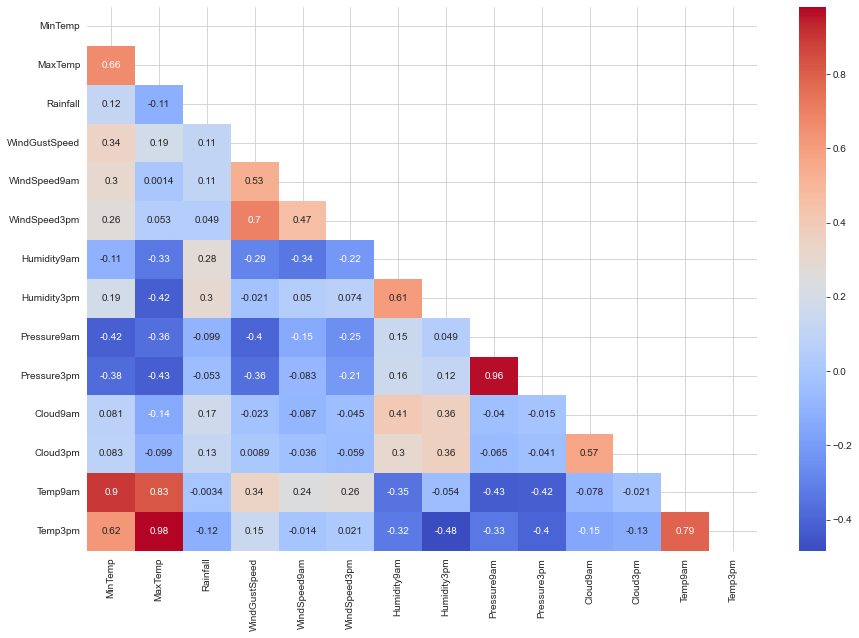

In [66]:
# Show features correlations
plt.figure(figsize=(15, 10))
sns.heatmap(data=X.corr(), cmap='coolwarm', mask=np.triu(X.corr()), annot=True)
plt.show()

In [67]:
ppl_fe = Pipeline([
    # Step 1: Features engineering
    ('conv_datetime', DatetimeFeatures(features_to_extract=['year','month','day_of_month'], variables=col_datetime, missing_values='ignore')),
    # ('drop_irrelevant', DropFeatures(['SubscriptionID','Address'])),
    ('drop_constant', DropConstantFeatures(tol=1, missing_values='ignore')),
    ('drop_duplicates', DropDuplicateFeatures()),
    ('drop_correlated', DropCorrelatedFeatures(method='pearson', threshold=0.8))
])

In [68]:
display(ppl_fe)

Pipeline(steps=[('conv_datetime',
                 DatetimeFeatures(features_to_extract=['year', 'month',
                                                       'day_of_month'],
                                  missing_values='ignore',
                                  variables=['Date'])),
                ('drop_constant',
                 DropConstantFeatures(missing_values='ignore')),
                ('drop_duplicates', DropDuplicateFeatures()),
                ('drop_correlated', DropCorrelatedFeatures())])

In [69]:
cols_before = X.columns
X_fe = ppl_fe.fit_transform(X)
X_fe.shape

(29679, 19)

In [70]:
# show dropped Correlated features
cols_after = X_fe.columns
dropped_features = cols_before.difference(cols_after)
print(f'Dropped features: {list(dropped_features)}')
added_features = cols_after.difference(cols_before)
print(f'Added features: {list(added_features)}')

Dropped features: ['Date', 'Pressure3pm', 'Temp3pm', 'Temp9am']
Added features: ['Date_day_of_month', 'Date_month', 'Date_year']


In [71]:
X_fe

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,RainToday,Date_year,Date_month,Date_day_of_month
0,Region1,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,8.0,5.0,No,2008,12,1
1,Region1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,5.0,5.0,No,2008,12,2
2,Region1,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,5.0,2.0,No,2008,12,3
3,Region1,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,5.0,5.0,No,2008,12,4
4,Region1,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,7.0,8.0,No,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29674,Region12,8.6,18.6,0.2,SSW,56.0,NNW,S,13.0,28.0,69.0,67.0,1025.7,2.0,2.0,No,2017,6,21
29675,Region12,9.5,17.8,0.2,SW,35.0,NNW,SSE,9.0,9.0,74.0,70.0,1028.3,2.0,2.0,No,2017,6,22
29676,Region12,8.7,19.4,0.0,NNW,30.0,NW,NW,13.0,15.0,83.0,57.0,1020.8,6.0,6.0,No,2017,6,23
29677,Region12,9.4,19.9,0.0,SW,43.0,WNW,W,22.0,28.0,61.0,41.0,1017.3,5.0,2.0,No,2017,6,24


## Handling Missing Data

In [72]:
# Check Null Data
X_fe.isnull().sum()

Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
WindGustDir          0
WindGustSpeed        0
WindDir9am           0
WindDir3pm           0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Cloud9am             0
Cloud3pm             0
RainToday            0
Date_year            0
Date_month           0
Date_day_of_month    0
dtype: int64

In [73]:
# Selecting categorical and numeric features
col_numerical = sel_numeric(X_fe)
col_categorical = sel_categorical(X_fe)

ppl_imp = Pipeline([
    # Step 2: Impute and scale features
    ('num', MeanMedianImputer(imputation_method='median', variables=col_numerical)),
    ('cat', CategoricalImputer(imputation_method='frequent', variables=col_categorical))
])

In [74]:
display(ppl_imp)

Pipeline(steps=[('num',
                 MeanMedianImputer(variables=['MinTemp', 'MaxTemp', 'Rainfall',
                                              'WindGustSpeed', 'WindSpeed9am',
                                              'WindSpeed3pm', 'Humidity9am',
                                              'Humidity3pm', 'Pressure9am',
                                              'Cloud9am', 'Cloud3pm',
                                              'Date_year', 'Date_month',
                                              'Date_day_of_month'])),
                ('cat',
                 CategoricalImputer(imputation_method='frequent',
                                    variables=['Location', 'WindGustDir',
                                               'WindDir9am', 'WindDir3pm',
                                               'RainToday']))])

In [75]:
X_im = ppl_imp.fit_transform(X_fe)
X_im

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,RainToday,Date_year,Date_month,Date_day_of_month
0,Region1,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,8.0,5.0,No,2008,12,1
1,Region1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,5.0,5.0,No,2008,12,2
2,Region1,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,5.0,2.0,No,2008,12,3
3,Region1,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,5.0,5.0,No,2008,12,4
4,Region1,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,7.0,8.0,No,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29674,Region12,8.6,18.6,0.2,SSW,56.0,NNW,S,13.0,28.0,69.0,67.0,1025.7,2.0,2.0,No,2017,6,21
29675,Region12,9.5,17.8,0.2,SW,35.0,NNW,SSE,9.0,9.0,74.0,70.0,1028.3,2.0,2.0,No,2017,6,22
29676,Region12,8.7,19.4,0.0,NNW,30.0,NW,NW,13.0,15.0,83.0,57.0,1020.8,6.0,6.0,No,2017,6,23
29677,Region12,9.4,19.9,0.0,SW,43.0,WNW,W,22.0,28.0,61.0,41.0,1017.3,5.0,2.0,No,2017,6,24


In [76]:
# Check Null Data
X_im.isnull().sum()

Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
WindGustDir          0
WindGustSpeed        0
WindDir9am           0
WindDir3pm           0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Cloud9am             0
Cloud3pm             0
RainToday            0
Date_year            0
Date_month           0
Date_day_of_month    0
dtype: int64

## Encoding Categorical Features

In [77]:
# Selecting categorical features
col_categorical = sel_categorical(X_im)

ppl_encode = Pipeline([
    # Step 3: Encode categorical features
    ('encode', OrdinalEncoder(encoding_method='arbitrary', variables=col_categorical))
])

In [78]:
X_en = ppl_encode.fit_transform(X_im)
X_en

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,RainToday,Date_year,Date_month,Date_day_of_month
0,0,13.4,22.9,0.6,0,44.0,0,0,20.0,24.0,71.0,22.0,1007.7,8.0,5.0,0,2008,12,1
1,0,7.4,25.1,0.0,1,44.0,1,1,4.0,22.0,44.0,25.0,1010.6,5.0,5.0,0,2008,12,2
2,0,12.9,25.7,0.0,2,46.0,0,1,19.0,26.0,38.0,30.0,1007.6,5.0,2.0,0,2008,12,3
3,0,9.2,28.0,0.0,3,24.0,2,2,11.0,9.0,45.0,16.0,1017.6,5.0,5.0,0,2008,12,4
4,0,17.5,32.3,1.0,0,41.0,3,3,7.0,20.0,82.0,33.0,1010.8,7.0,8.0,0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29674,10,8.6,18.6,0.2,15,56.0,1,13,13.0,28.0,69.0,67.0,1025.7,2.0,2.0,0,2017,6,21
29675,10,9.5,17.8,0.2,6,35.0,1,5,9.0,9.0,74.0,70.0,1028.3,2.0,2.0,0,2017,6,22
29676,10,8.7,19.4,0.0,10,30.0,13,3,13.0,15.0,83.0,57.0,1020.8,6.0,6.0,0,2017,6,23
29677,10,9.4,19.9,0.0,6,43.0,14,4,22.0,28.0,61.0,41.0,1017.3,5.0,2.0,0,2017,6,24


In [79]:
X_en.isnull().sum()

Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
WindGustDir          0
WindGustSpeed        0
WindDir9am           0
WindDir3pm           0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Cloud9am             0
Cloud3pm             0
RainToday            0
Date_year            0
Date_month           0
Date_day_of_month    0
dtype: int64

## Feature Scaling

In [80]:
ppl_scale = Pipeline([
    # Step 4: Features scaling
    ('scaler', YeoJohnsonTransformer())
])

In [81]:
X_sc = ppl_scale.fit_transform(X_en)
X_sc

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,RainToday,Date_year,Date_month,Date_day_of_month
0,0.000000,16.288579,4.382608,0.311366,0.000000,9.765618,0.000000,0.000000,8.490779,9.816123,211.276127,14.479290,2.124076e+08,14.404826,7.914360,-0.0,6.776762e+15,7.160850,0.900987
1,0.000000,8.580361,4.546723,-0.000000,0.868802,9.765618,0.880709,0.918254,2.681286,9.256347,113.422631,16.123924,2.142004e+08,7.907159,7.914360,-0.0,6.776762e+15,7.160850,1.680999
2,0.000000,15.630999,4.589538,-0.000000,1.583014,9.996438,0.000000,0.918254,8.202470,10.358216,93.810645,18.788555,2.123460e+08,7.907159,2.584589,-0.0,6.776762e+15,7.160850,2.391556
3,0.000000,10.846800,4.746797,-0.000000,2.212324,7.039364,1.618935,1.734727,5.632443,4.963377,116.775877,11.059719,2.185686e+08,7.907159,7.914360,-0.0,6.776762e+15,7.160850,3.054564
4,0.000000,21.764062,5.015613,0.386197,0.000000,9.408265,2.277592,2.491413,4.076554,8.676691,254.936058,20.348025,2.143244e+08,12.128887,14.421691,-0.0,6.776762e+15,7.160850,3.681987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29674,6.289355,10.086322,4.023020,0.154208,7.502824,11.074826,0.880709,8.711224,6.328379,10.884437,203.553958,36.655395,2.236960e+08,2.583285,2.584589,-0.0,6.930068e+15,4.143562,11.621057
29675,6.289355,11.228796,3.949210,0.154208,3.816319,8.647628,0.880709,3.890201,4.886777,4.963377,222.987026,38.007165,2.253585e+08,2.583285,2.584589,-0.0,6.930068e+15,4.143562,12.047537
29676,6.289355,10.212735,4.094439,-0.000000,5.593828,7.957057,7.198662,2.491413,6.328379,7.120982,259.000794,32.064558,2.205849e+08,9.959927,9.969966,-0.0,6.930068e+15,4.143562,12.468971
29677,6.289355,11.101337,4.137937,-0.000000,3.816319,9.648036,7.607479,3.206540,9.050951,10.884437,173.375734,24.387531,2.183802e+08,7.907159,2.584589,-0.0,6.930068e+15,4.143562,12.885624
